# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [105]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [106]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

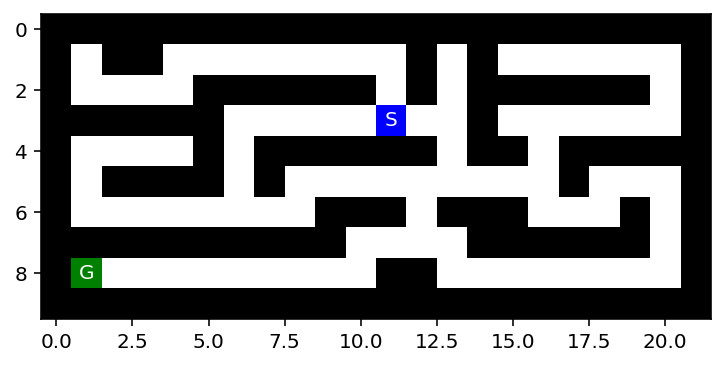

In [107]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [108]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [109]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/kevinleong/Documents/GitHub/CS7320-AI/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [110]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

* Initial State - in this case the initial state would be the starting position of the maze
* Actions - the actions are constricted to moving in the cardinal directions
* Transition Model - f(x)


Give some estimates for the problem size:

* state space size
* depth of the optimal solution
* maximum depth of tree
* maximum branching factor

Describe how you would determine these values for a given maze.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]
Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

**Notes:**

* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the reached and frontier data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a reached data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a reached data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

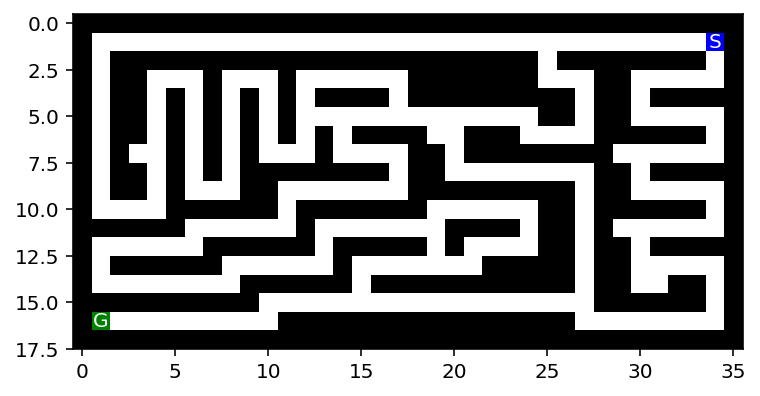

In [183]:
# Your code goes here

# Open the maze and read from the file
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
mh.show_maze(maze)

# Expand creates the tree using the actions it took
def expand(maze, node):
    currX = node.pos[0]
    currY = node.pos[1]
    actions = []

    if(currX - 1 >= 0 and currX + 1 <= len(maze) - 1):
        if(mh.look(maze, (currX + 1, currY)) != 'X'):
            newAction = Node((currX + 1, currY), node, "South", node.cost + 1)
            actions.append(newAction)
        if(mh.look(maze, (currX - 1, currY)) != 'X'):
            newAction = Node((currX - 1, currY), node, "North", node.cost + 1)
            actions.append(newAction)
    if(currY - 1 >= 0 and currY + 1 <= len(maze[0]) - 1):
        if(mh.look(maze, (currX, currY + 1)) != 'X'):
            newAction = Node((currX, currY + 1), node, "East", node.cost + 1)
            actions.append(newAction)
        if(mh.look(maze, (currX, currY - 1)) != 'X'):
            newAction = Node((currX, currY - 1), node, "West", node.cost + 1)
            actions.append(newAction)
    return actions

# Breadth First Search
def BFS(maze):

    pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize  = 0, 0, 0, 0, 0

    # Starting spot
    start_pos = mh.find_pos(maze, what = "S")

    # Create root node
    initial = Node(start_pos, None, None, 0)
    
    # Reached and frontier data stored in arrays here
    reached = [initial.pos]
    frontier = [initial]

    while frontier:
        
        # Checks max frontier size
        if(len(frontier) > maxFrontSize):
            maxFrontSize = len(frontier)

        # Pop the FIRST element for FIFO
        newNode = frontier.pop(0)

        # Expand tree and search for Goal
        actions = expand(maze, newNode)
        # Add to max expanded nodes
        maxExpNodes += len(actions)
        maxNodesMem += len(actions)
        # Check max tree depth
        maxTreeDepth = max(maxTreeDepth, len(newNode.get_path_from_root()))

        for thisNode in actions:
            # Found Goal
            if mh.look(maze, thisNode.pos) == 'G': 
                pathCost = len(thisNode.get_path_from_root())
                return thisNode, pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize

            # Update reached and frontier
            if thisNode.pos not in reached:
                reached.append(thisNode.pos)
                frontier.append(thisNode)
    return "FAIL", pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize

In [112]:
# Cycle Checking via the current path
def isCycle(node):
    path = node.get_path_from_root()
    for nodes in path[1:(len(path) - 1)]:
        if nodes.pos == node.pos:
            return True
    return False

# Depth First Search
def DFS(maze):

    pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize  = 0, 0, 0, 0, 0
    
    # Starting position
    start_pos = mh.find_pos(maze, what = "S")

    # Root node
    initial = Node(start_pos, None, None, 0)

    # Initialize frontier and initial result
    frontier = [initial]
    result = "FAIL"

    while frontier:

        # Checks max frontier size
        if(len(frontier) > maxFrontSize):
            maxFrontSize = len(frontier)

        # LIFO 
        newNode = frontier.pop()
        
        # Check if we found the Goal
        if mh.look(maze, newNode.pos) == 'G': 
            result = newNode
            pathCost = len(newNode.get_path_from_root())
            return result, pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize

        # Cycle check
        elif not isCycle(newNode):
            # Expand tree
            actions = expand(maze, newNode)
            
            # Add to max expanded nodes
            maxExpNodes += len(actions)
            maxNodesMem += len(actions)
            # Check max tree depth
            maxTreeDepth = max(maxTreeDepth, len(newNode.get_path_from_root()))
            
            # Append to actions
            for thisNode in actions:
                frontier.append(thisNode)
        else:
            # Delete if there is a cycle
            del newNode
            maxNodesMem -= 1
            continue

    if(result != "FAIL"):
        pathCost = len(result.get_path_from_root())
    else:
        pathCost = 0
    return result, pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize

# for items in DFS(maze).get_path_from_root():
#     print(items.pos)

How does BFS and DFS deal with loops (cycles)?

In the case of BFS, it uses a 'reached' list to ensure that cycles do not appear. For instance, if a node were to reappear in the expansion and was already in the reached list, it would be skipped because continuing there would create a cycle. On the other hand, DFS has a cycle checking function that checks the current path (and the current path alone) for cycles. 

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

* BFS
My BFS is complete - as it does find the right path each time. It is also optimal because each step has the same cost. Both its time and space complexity is O(b^d) where b is the max branching factor and d is the depth of the solution. 
* DFS
My DFS is also complete and finds the correct path each time. However it is NOT optimal because it only finds the first solution it finds. It's time complexity is O(b^m) where b is the max branching factor and m is the maximum tree depth. However, its space complexity is only O(bm) - linear!

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [113]:
# Your code goes here
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)

# Finds the MANHATTAN distance between two points
def findDist(pair1, pair2):
    return abs(pair1[0] - pair2[0]) + abs(pair1[1] - pair2[1])

# Greedy Best First
def GBFS(maze):
    
    pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize  = 0, 0, 0, 0, 0

    # Defines start and goal states
    start = mh.find_pos(maze, what = "S")
    goal = mh.find_pos(maze, what = "G")

    # Create root node
    initial = Node(start, None, None, 0)
    
    # Initialize reached and frontier lists
    # Frontier is different because it also stores cost
    reached = [initial.pos]
    frontier = [(0, initial)]

    while frontier:

        # Checks max frontier size
        if(len(frontier) > maxFrontSize):
            maxFrontSize = len(frontier)
            
        # Sort the frontier to ensure it's a priority 
        frontier.sort(key = lambda x: x[0])

        # Same as BFS
        newNode = frontier.pop(0)
        actions = expand(maze, newNode[1])
        for thisNode in actions:

            # Add to max expanded nodes
            maxExpNodes += len(actions)
            maxNodesMem += len(actions)
            # Check max tree depth
            maxTreeDepth = max(maxTreeDepth, len(newNode[1].get_path_from_root()))

            if mh.look(maze, thisNode.pos) == 'G': 
                pathCost = len(thisNode.get_path_from_root())
                return thisNode, pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize

            if thisNode.pos not in reached:
                reached.append(thisNode.pos)
                frontier.append( (findDist(goal, thisNode.pos), thisNode) )
    return "FAIL", pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize

# for items in GBFS(maze)[0].get_path_from_root():
#     print(items.pos)
    

In [114]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)

# A* Search
def AStar(maze):

    pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize  = 0, 0, 0, 0, 0

    # Initialize start and goal 
    start = mh.find_pos(maze, what = "S")
    goal = mh.find_pos(maze, what = "G")

    # Initialize root node
    initial = Node(start, None, None, 0)
    
    # Create reached and frontier lists
    reached = [initial.pos]
    frontier = [(0 + initial.cost, initial)]

    while frontier:

         # Checks max frontier size
        if(len(frontier) > maxFrontSize):
            maxFrontSize = len(frontier)

        frontier.sort(key = lambda x: x[0])
        newNode = frontier.pop(0)
        actions = expand(maze, newNode[1])
        for thisNode in actions:

            # Add to max expanded nodes
            maxExpNodes += len(actions)
            maxNodesMem += len(actions)
            # Check max tree depth
            maxTreeDepth = max(maxTreeDepth, len(newNode[1].get_path_from_root()))
            
            if mh.look(maze, thisNode.pos) == 'G':
                pathCost = len(thisNode.get_path_from_root())
                return thisNode, pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize

            if thisNode.pos not in reached:
                reached.append(thisNode.pos)
                frontier.append( ((findDist(goal, thisNode.pos) + thisNode.cost), thisNode) )
    return "FAIL", pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize

# for items in AStar(maze)[0].get_path_from_root():
#     print(items.pos)

Are your implementations complete and optimal? What is the time and space complexity?

Both Greedy Best First Search and A* Search are complete. However, only A* search is complete. GBFS has a time and space complexity of O(b^m) - much like DFS in its worst case. However, if the heuristic is accurate all of the time, it's complexity becomes linear - O(bm) where b is the maximum branching factor and m is the maximum depth of the tree. A* search has a time and space complexity of a certain number of nodes where the function f(n) - which in this case is the heuristic and path cost - is less than C* (which is the lowerst ocst of going to a goal node). A* needs to expand all these in order to find the optimal solution.

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [184]:
# Add code
# Open Small Maze
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)

BFS_output = BFS(maze)
DFS_output = DFS(maze)
GBFS_output = GBFS(maze)
AStar_output = AStar(maze)

Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |           |                |                |               |                   |
| DFS       |           |                |                |               |                   |
| GBS       |           |                |                |               |                   |
| A*        |           |                |                |               |                   |

__Medium Maze__

...

Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

In [185]:
# Add charts
import numpy as np  
import pandas as pd

algorithms = {
    "Algorithms": ["Path Cost", "# of Nodes Expanded", "Max Tree Depth", "Max # Nodes in Memory", "Max Frontier Size"],
    "BFS" : [BFS_output[1], BFS_output[2], BFS_output[3], BFS_output[4], BFS_output[5]],
    "DFS" : [DFS_output[1], DFS_output[2], DFS_output[3], DFS_output[4], DFS_output[5]],
    "GBFS" : [GBFS_output[1], GBFS_output[2], GBFS_output[3], GBFS_output[4], GBFS_output[5]],
    "A*" : [AStar_output[1], AStar_output[2], AStar_output[3], AStar_output[4], AStar_output[5]]
}

df = pd.DataFrame(algorithms)
df

,Algorithms,BFS,DFS,GBFS,A*
0,Path Cost,20,50,30,20
1,# of Nodes Expanded,185,150,173,238
2,Max Tree Depth,19,49,29,19
3,Max # Nodes in Memory,185,105,173,238
4,Max Frontier Size,9,33,5,8


Discuss the most important lessons you have learned from implementing the different search strategies. 

What I found interesting in developing all of these search strategies is how they all complete a similar task in such different ways. I think that an important aspect is memory management. Specifically, in DFS and other larger searches, when I tested the code on larger mazes, I realized that I needed to get rid of a lot of "useless" nodes and paths in memory. As well as this, I thought that the change in how long each search took because of their individual time complexities was interesting as well. Some took longer than others eventhough their code was quite similar. I think this was the cost for finding an optimal solution rather than just a complete one.

## Graduate student advanced task: Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

Below, you can see the implementation for IDS using DFS. The change that I made was that it compares the node's current depth with the depth that's in the iterative search function. It does this for infinity times until it finds a goal or it cuts off.

In [186]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

def DLS(maze, depth):
    pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize  = 0, 0, 0, 0, 0
    
    # Starting position
    start_pos = mh.find_pos(maze, what = "S")

    # Root node
    initial = Node(start_pos, None, None, 0)

    # Initialize frontier and initial result
    frontier = [initial]
    result = "FAIL"

    while frontier:

        # Checks max frontier size
        if(len(frontier) > maxFrontSize):
            maxFrontSize = len(frontier)

        # LIFO 
        newNode = frontier.pop()
        
        # Check if we found the Goal
        if mh.look(maze, newNode.pos) == 'G': 
            result = newNode
            pathCost = len(newNode.get_path_from_root())
            return result, pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize

        # New addition for DLS
        if len(newNode.get_path_from_root()) > depth:
            result = "CUTOFF"

        # Cycle check
        elif not isCycle(newNode):
            # Expand tree
            actions = expand(maze, newNode)
            
            # Add to max expanded nodes
            maxExpNodes += len(actions)
            maxNodesMem += len(actions)
            # Check max tree depth
            maxTreeDepth = max(maxTreeDepth, len(newNode.get_path_from_root()))
            
            # Append to actions
            for thisNode in actions:
                frontier.append(thisNode)
        else:
            # Delete if there is a cycle
            del newNode
            maxNodesMem -= 1
            continue

    if(type(result) is str):
        pathCost = 0
    else:
        pathCost = len(result.get_path_from_root())

    return result, pathCost, maxExpNodes, maxTreeDepth, maxNodesMem, maxFrontSize


def IDS(maze):
    depth = 0
    while depth < float("inf"):
        result = DLS(maze, depth)
        if result[0] != "FAIL" or result[0] != "CUTOFF": return result
        depth += 1

print(IDS(maze))

('CUTOFF', 0, 0, 0, 0, 1)


In [188]:
# Your code/answer goes here
with open("mult_goal.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)

BFS_output = BFS(maze)
DFS_output = DFS(maze)
GBFS_output = GBFS(maze)
AStar_output = AStar(maze)
IDS_output = IDS(maze)

import numpy as np  
import pandas as pd

algorithms = {
    "Algorithms": ["Found a Goal?","Path Cost", "# of Nodes Expanded", "Max Tree Depth", "Max # Nodes in Memory", "Max Frontier Size"],
    "BFS" : [BFS_output[0], BFS_output[1], BFS_output[2], BFS_output[3], BFS_output[4], BFS_output[5]],
    "DFS" : [DFS_output[0], DFS_output[1], DFS_output[2], DFS_output[3], DFS_output[4], DFS_output[5]],
    "GBFS" : [GBFS_output[0], GBFS_output[1], GBFS_output[2], GBFS_output[3], GBFS_output[4], GBFS_output[5]],
    "A*" : [AStar_output[0], AStar_output[1], AStar_output[2], AStar_output[3], AStar_output[4], AStar_output[5]],
    "IDS" : [IDS_output[0], IDS_output[1], IDS_output[2], IDS_output[3], IDS_output[4], IDS_output[5]]
}

df = pd.DataFrame(algorithms)
df

,Algorithms,BFS,DFS,GBFS,A*,IDS
0,Found a Goal?,"Node - pos = (5, 15); action = West; cost = 29","Node - pos = (10, 2); action = East; cost = 43","Node - pos = (3, 15); action = West; cost = 31","Node - pos = (5, 15); action = West; cost = 29",CUTOFF
1,Path Cost,30,44,32,30,0
2,# of Nodes Expanded,169,87,272,244,0
3,Max Tree Depth,29,43,32,29,0
4,Max # Nodes in Memory,169,78,272,244,0
5,Max Frontier Size,5,36,6,6,1


What I found interesting is the different goals that each search found. While IDS didn't find a goal, both BFS and A* found the fastest and most efficient goals. GBFS looked at the next best answer. DFS found a middle-level solution. I put that one there as a middle ground so finding it was kind of interesting. I also found it interesting that IDS cutoff so quickly. It didn't find a single goal with its iterations.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [118]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [119]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [120]:
# Your code/answer goes here